$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\,\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo, HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive, rcParams, animation
from ipywidgets import interact, FloatSlider, fixed, IntSlider
interactive(True)
rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *French 6, starting p.189.*

Like for the previous lecture, these notes come with a lot of animations. If you use Jupyter, you can re-create them all from the notebook.
If instead you read the pdf notes, I saved them all in .mp4 format and included them in the .zip archive.

And finally, a reminder about our go-to set-up: the wave on a string. I recorded three demos, shown below and also at

* https://youtu.be/bcIeaNoB880 and https://play.library.utoronto.ca/1b369519194f7f25a371f977467e023d
* https://youtu.be/DL47_MbRPmc and https://play.library.utoronto.ca/0813eb54d3f1db4a9c7ce2274c9ed8cd
* https://youtu.be/_am6ogAuSjc and https://play.library.utoronto.ca/9553f6a2c1dea0c96f41ed9347fa1fbe

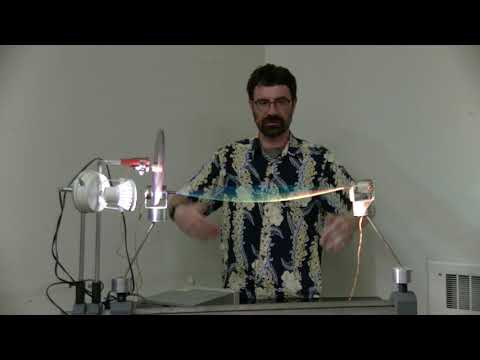

In [2]:
YouTubeVideo('bcIeaNoB880', width=560, height=315)

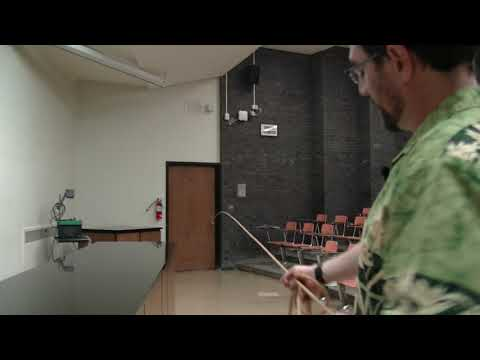

In [3]:
YouTubeVideo('DL47_MbRPmc', width=560, height=315)

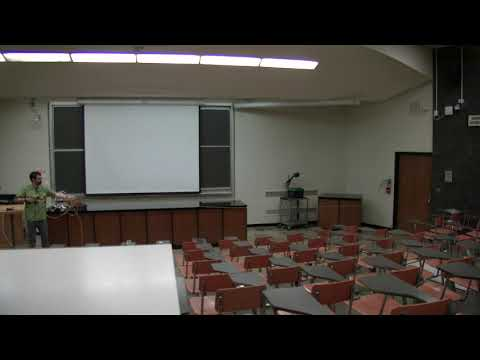

In [4]:
YouTubeVideo('_am6ogAuSjc', width=560, height=315)

# Expectations

## Remember

* The orthogonality relations for sines and cosines.
* The energy of any solution is the sum of the energies of each single mode.

## Understand

* Why standing wave modes are orthogonal normal modes of the vibrating taut string.
* How a spectrum is a quick graphic way to show a series of modes
* How and why standing wave modes behave like simple harmonic oscillators.

## Apply

* Anything that appears in the worked examples, tutorials and problem sets.

# Results from Fourier Series

We just saw that if $y_n$ and $y_m$ were modes of vibrations of the string, then a linear combination of those two was a solution. But is the converse true? Namely, if $y$ is a solution, can it be written as $\sum_{n=1}^{\infty} A_n y_n$? After all, maybe we have only covered the set of solutions which were separable, and we are missing plenty of elementary solutions that cannot be written as $y_n(t, x) = f_n(x)h_n(t)$.

The answer is yes, the decomposition exists and is unique.
You may see the proof in a calculus course, when you learn about Fourier series. Just like earlier in the course, you are not required to know the math of it, and in this lecture we will just accept the results. I recommended you watch the video below in a previous lecture (https://youtu.be/r6sGWTCMz2k; 25 minutes) because it is nice. The recommendation still holds, if you have the time.

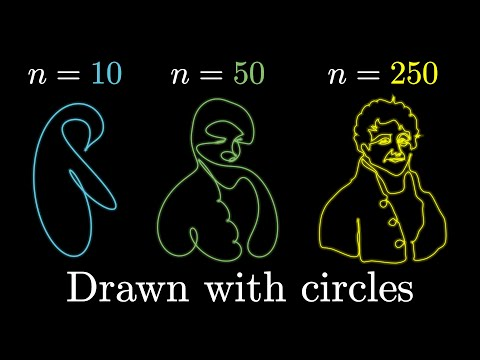

In [5]:
YouTubeVideo('r6sGWTCMz2k', width=560, height=315)

Just as the existence and unicity of the decomposition into eigenmodes for a coupled system of oscillations was a gift from a linear algebra class, the existence and unicity of the decomposition of any solution into standing wave modes is a gift from Fourier analysis.

Namely, the main result to remember from a lecture on Fourier series is that if a function $s(x)$ of the real variable $x$ is periodic[^1], with period $2L$, then $\exists \{A_n, B_n\}_{n\in \mathbb N^*}$ such that 
$$ s(x) = \frac{A_0}2 + \sum_{n=1}^\infty\left[ A_n \cos(k_n x) + B_n \sin(k_n x)\right], $$
with $k_n = \pi n/L$, and
$$A_n = \frac1L\int_{-L}^{L}s(x)\cos(k_n x)\di x \andeq B_n = \frac1L\int_{-L}^{L}s(x)\sin(k_n x)\di x.$$

*Note: I defined the period to be $2L$ in anticipation of the content of this lecture, which makes the expressions above look different from what you would see in other resources like Wikipedia.*

* If the function is odd, i.e., $s(x) = -s(-x)$, then it is even simpler, with
    $$A_n \equiv 0 \andeq s(x) = \sum_{n=1}^\infty B_n \sin(k_n x).$$
    Moreover, because $\sin(k_n x)$ is also odd, $s(x)\sin(k_n x)$ is even ($odd\times odd = even$), we don't need to compute the coefficient over the whole interval:
    $$B_n = 2\times \frac{1}L\int_0^L s(x)\sin(k_n x) \di x,$$
    which will be useful in this lecture.

* Similarly, if the function is even, i.e., $s(x) = s(-x)$, then $B_n \equiv 0$ and the Fourier series simplifies into
    $$s(x) = \frac{A_0}{2} + \sum_{n=1}^\infty A_n \cos(k_n x),$$
    where we have again that
    $$A_n = \frac{2}L\int_0^L s(x)\cos(k_n x) \di x,$$
    which we won't use in this lecture but could use in problems and exercises.


You may object that Fourier series apply to periodic functions, i.e., functions that exist on $(-\infty, \infty)$, not $[0, L]$.
The connection is that we can imagine our solution on $[0, L]$ as a "cropped" sub-set of a function that would be periodic.
In this case, the actual solution and the corresponding infinitely long and periodic function share the same Fourier coefficients.

Let me plot a sketch of what I mean by "actual solution" (below) and "infinitely long and periodic function" (figure after that one).

In [6]:
# Definition of the function
# Let's draw a triangular shape, with the top at a point where the string is plucked
L = 1.  # [m] length of the string
x = np.linspace(0., L, 128)  # x-array
ftsz = 13  # font size
a = 0.01  # how high the string is plucked [m]

def plot_pluck(pluck_point):
    s = a * x / pluck_point  # the first part of the string
    s[x > pluck_point] = a * (L - x[x > pluck_point]) / (L-pluck_point)  # the 2nd part

    plt.figure(figsize=(6, 3))
    plt.plot(x/L, s/a, 'r')
    plt.grid()
    plt.xlabel('$x/L$', fontsize=ftsz)
    plt.ylabel('$s/a$', fontsize=ftsz)
    plt.axvline(pluck_point/L, color='k', linestyle='--')
    plt.title('The plucked string on $[0, L]$', fontsize=ftsz)
    plt.ylim([0., 1.2])
    plt.autoscale(enable=True, axis='x', tight=True)
    
    return s

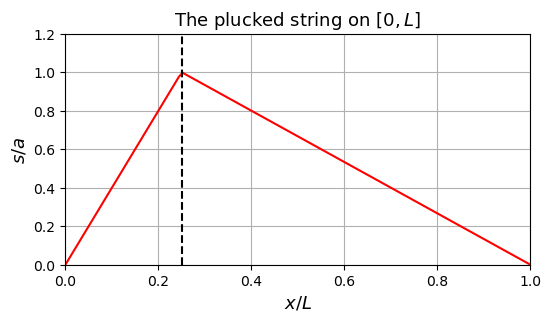

In [7]:
s = plot_pluck(0.25*L)

In [8]:
def plot_extension(pluck_point, s):
    x_extend = np.linspace(-1.5*L, 2.5*L, 512)  # x extended beyoind [0, L]
    s_extend = a * x_extend / pluck_point  # the first part of the string
    s_extend[x_extend > pluck_point] = (L - x_extend[x_extend > pluck_point]
                                       ) * a / (L-pluck_point)
    s_extend[x_extend > 2*L-pluck_point] = (x_extend[x_extend > 2*L-pluck_point]/pluck_point
                                            - 2*L/pluck_point) * a
    s_extend[x_extend > 2*L+pluck_point] = (L - x_extend[x_extend > 2*L+pluck_point]
                                           )  * a / (L-pluck_point) + 2*a*L/(L-pluck_point)
    s_extend[x_extend < -pluck_point] = a * (L - x_extend[x_extend < -pluck_point]
                                            ) / (L-pluck_point) - 2*a*L/(L-pluck_point)

    plt.figure(figsize=(12, 3))
    plt.plot(x_extend/L, s_extend/a, 'b--', label='$s(x)$ extended')
    plt.plot(x/L, s/a, 'r', label='$s(x)$')
    plt.grid()
    plt.xlabel('$x/L$', fontsize=ftsz)
    plt.ylabel('$s/a$', fontsize=ftsz)
    plt.ylim([-1.2, 1.2])
    plt.axhline(0., color='k')
    plt.axvline(pluck_point/L, color='k', linestyle='--')
    plt.axvline(0., color='k')
    plt.axvline(1., color='k')
    plt.axvline(-1., color='k', linestyle=":")
    plt.axvline(2., color='k', linestyle=":")
    plt.title('Equivalent plucked string on an extended interval', fontsize=ftsz)
    plt.legend(fontsize=ftsz)
    plt.autoscale(enable=True, axis='x', tight=True)
    
    return

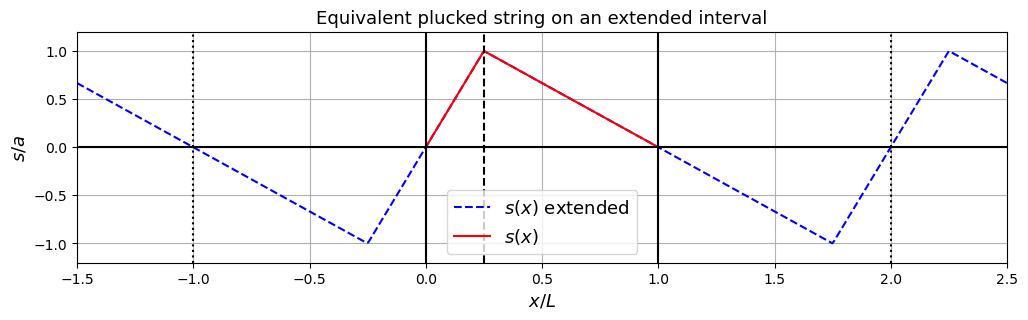

In [9]:
plot_extension(0.25*L, s)

While the plucked string (red, solid line on fig. 6) is not periodic, the blue, dashed line is, with period $2L$.
Morevoer, it is odd, and can be decomposed as a Fourier series.
In the interval $[0, L]$, the two are indistinguishable, and the plucked string shares the extended string's expression.

In general, any function that is zero at both ends can be extended as an odd function, and only the sine decomposition need to be performed.

So, let me recapitulate, and this part is important.
Because the wave equation is linear (that's because there are only derivatives in them, and the derivation operation is linear), we knew from last lecture that
$$y = \sum_{n=1}^\infty \cos(\omega_n t +\phi_n)\left[A_n\cos(k_n x) + B_n\sin(k_n x)\right] \thrfor y\text{ is a solution},$$
provided $k_n = \pi n/L$ and $\omega_n = vk_n$.

And because any string shape can be described as a periodic function evaluated on $[0, L]$, Fourier tells us that the reverse is true: that if $y$ is a solution, then it can be written as a Fourier series, which is essentially what is left of the "$\Rightarrow$" above. In this case, the mean position is zero, so, $A_0 = 0$ and we can turn the "$\Rightarrow$" in the previous statement into a "$\Leftrightarrow$".

Mathematically speaking, the rest of this section is basically an application of the Fourier series theory to string vibrations.
Knowing Fourier series is not a prerequisite, though, because I will basically walk you through all the important steps as if you have never seen it.

# Orthogonality of Standing Wave Modes

With a homogeneous chain of coupled oscillators (i.e., all masses, stiffnesses, pendulums, etc., were equal), the linked masses resulted in a symmetric matrix to diagonalize, in which case the eigenvectors were orthogonal to each other.
Something similar is happening here: the string is homogeneous ($\mu$ is a constant), and the normal modes are orthogonal to each other.
The "dot product" however needs to be redefined, because the vector space has changed.
With symmetric coupled oscillators, the inner product of the vector space was the good ol' dot product.
Now, the inner product for two functions $f$ and $g$ is (assuming the integral can be computed, of course)
\begin{equation}
    f\odot g = \frac2L \int_0^L f(x)g(x)\di x.\label{eq:odot}
\end{equation}

The $2/L$ pre-factor is optional. We use it to ensure that the functions are orthonormal with respect to the inner product. Indeed, here is a claim:
$$ \boxed{\sin(k_n x) \odot \sin(k_m x) = \delta_{mn}}.$$
The symbol $\delta_{mn}$ is called the Kronecker delta, defined by $\delta_{mn} = 1$ if $m=n$, and zero otherwise.
That is, **modes are orthonormal to each other**.

*Note: Similarly,* $\cos(k_n x) \odot \cos(k_m x) = \delta_{mn}$ and $\cos(k_n x) \odot \sin(k_m x) = 0$. *Yes, the last one is always zero, even if* $m = n$ *, but the inner product has to be redefined as*
$$f\odot g = \frac1L \int_{-L}^L f(x)g(x)\di x,$$
*and the string position has to be artificially extended into the negative positions range. This inner product actually gives the same result for the former inner product, but the first definition uses parity properties of $\sin$ and $\cos$ and is simple enough for our purposes. As far as I can tell though, we won't be using these other two relationships with the boundary conditions of strings attached to walls. We would if the origin of the $x$-axis was in the middle of the two walls, or if we had other boundary conditions. Therefore, it is not completely useless to know that these relationships exist.*

***

*While not difficult, and even though it resembles a result we have seen earlier, I skipped the proof in class. Here it is, FYI. I am also providing a graphic example below, where you should see that the areas of $\sin(k_n x)\sin(k_m x)$ above the zero line compensate exactly those under the zero line, yielding a zero value (unless $n=m$ of course). Don't worry about remembering or even understanding the mathematical derivation.*

Recall that 
$$\cos(a\pm b) = \cos a \cos b \mp \sin a \sin b.$$

Sum those two and you get
$$ 2\cos a\cos b = \cos(a-b) + \cos(a+b). $$
Subtract them and you obtain
$$ 2\sin a\sin b = \cos(a-b) - \cos(a+b). $$


Let $a = n\pi x/L$ and $b = m\pi x/L$.
Consider two cases:

* $m\neq n$: 

\begin{align*}
    \sin a \odot \sin b & = \frac{1}{L} \int_0^L \left[\cos\left(\frac{(n-m) \pi x}{L}\right) +  \cos\left(\frac{(n+m)\pi x}{L}\right) \right] \di x \\
                        & = \frac{1}{L} \left[\frac{L}{\pi(n-m)}\sin\left(\frac{(n-m) \pi x}{L}\right) + \frac{L}{\pi(n+m)} \sin\left(\frac{(n+m)\pi x}{L}\right) \right]_0^L \\
                        & = 0 + 0 = 0 \quad\textrm{if}\quad m \neq n.
\end{align*}

* $m=n$ on the other hand, we need to go back to $2\sin a\sin b = \cos(a-b) - \cos(a+b)$, which, if $a = b$, becomes $2\sin^2(a) = 1 - \cos(2a)$. 
Of the two integrals that are to be computed, $\int_0^L \cos(2n\pi x/L) \di x = 0$ but $\int_0^L \di x = L$, and therefore,
$$\sin\left(\frac{n\pi x}L\right) \odot \sin\left(\frac{n\pi x}L\right) = \frac{2}{L}\frac{L}2 = 1. $$

Very similar derivations exist for $\cos(k_n x) \odot \cos(k_m x) = \delta_{mn}$ and $\cos(k_n x) \odot \sin(k_m x) = 0$.

***

In [10]:
def multsincos(n, m, first, second):
    """ a graphic illustration of what happens when two sines and/or cosines
    are multiplied 
    IN: n, m are strictly positive integer modes
    first, second are both 'sin' or 'cos' """
    def fct(nm, xloc, choice):
        if choice == 'sin':
            return np.sin(nm*np.pi*xloc)
        elif choice == 'cos':
            return np.cos(nm*np.pi*xloc)
    
    if first != second:
        xmin = -1.
    else:
        xmin = 0.
    
    x = np.linspace(xmin, 1, 256)  # use L=1 m for simplicity
        
    fg, ax = plt.subplots(2, 1, dpi=100, sharex=True)
    ftsz = 13  # font size
    
    ax[0].plot(x, fct(n, x, first), label='{0}$({1} \pi x/L)$'.format(first, n))
    ax[0].plot(x, fct(m, x, second), '--', label='{0}$({1}\pi x/L)$'.format(second, m))
    ax[0].axhline(0., color='k')
    ax[0].axvline(0., color='k')
    ax[0].set_xlim(xmin, 1)
    ax[0].set_ylabel('$y_n$ and $y_m$', fontsize=ftsz)
    ax[0].legend()
    ax[0].grid()
    
    ax[1].plot(x, fct(n, x, first)*fct(m, x, second),
               label='{0}$(1\pi x/L)${2}$({3} \pi x/L)$'.format(first, n, second, m))
    plt.fill_between(x , fct(n, x, first)*fct(m, x, second))
    ax[1].axvline(0., color='k')
    ax[1].axhline(0., color='k')
    ax[1].set_xlabel('$x/L$', fontsize=ftsz)
    ax[1].set_ylabel('$y_n y_m$', fontsize=ftsz)
    ax[1].legend()
    ax[1].grid()
    
    fg.tight_layout()

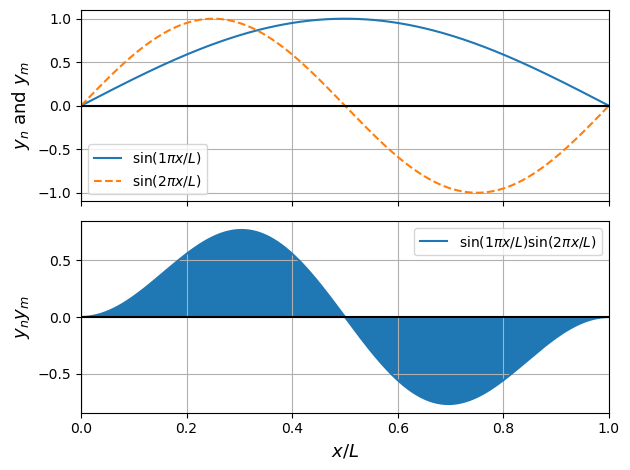

In [11]:
multsincos(1, 2, 'sin', 'sin')  # for pdf export

In [12]:
interact(multsincos, n=IntSlider(min=1, max=5, value=1), m=IntSlider(min=1, max=5, value=2), first=['sin', 'cos'], second=['sin', 'cos'])

interactive(children=(IntSlider(value=1, description='n', max=5, min=1), IntSlider(value=2, description='m', m…

<function __main__.multsincos(n, m, first, second)>

Note that similarly to the last lecture, these results can be extended to strings that are non-homogeneous (i.e., $v$ depends on $x$, like a whip getting thinner away from the handle). A new inner product would need to be defined.
This would be the equivalent of a matrix that is not symmetric in the case of coupled oscillators, sort of like what you have (or had) to do in the homework assignment.
These considerations are outside of what you need to know for this class, besides playing with it numerically.

# Initial value problems

## Method

Like in previous lectures, while we know that the general form of the solution is in the form
$$y(t, x) = \sum_{n = 1}^{\infty} C_n\cos(\omega_n t + \phi_n)\sin(k_n x),$$
finding the amplitudes $C_n$ and phases $\phi_n$ remains to be computed for an IVP.
And like for coupled oscillators, the orthogonality condition will help us to solve this problem relatively easily.

First of all, let me to rewrite the general solution as
\begin{equation}
    \boxed{y(t, x) = \sum_{n = 1}^{\infty} \left[\alpha_n \cos(\omega_n t) + \beta_n \sin(\omega_n t)\right]\sin(k_n x)},\label{eq:generaly}
\end{equation}
which is more convenient for IVPs.

Consider now an initial value problem
$$ y(0, x) = P(x)\andeq \dot y(0, x) = V(x). $$

We now have two equations,
$$\sum_{n = 1}^{\infty} \alpha_n\sin(k_n x) = P(x) \andeq \sum_{n = 1}^{\infty} \omega_n\beta_n\sin(k_n x) = V(x).$$

These could be seen as two equations with an infinite number of unknown each ($2\times \infty$ unknown total). But because these unknown multiply eigenfunctions that are all orthogonal to each other, we can use projections to turn it into a system with as many equations as there are unknown.
For example,
$$\left[\sum_{n = 1}^{\infty} \alpha_n\sin(k_n x)\right] \odot \sin(k_m x) = \sum_{n = 1}^{\infty} \alpha_n\left[\sin(k_n x) \odot \sin(k_m x)\right] = \alpha_m.$$
*Note: in the result above, I used that the $\sin(k_n x)$ functions are orthonormal with respect to the inner product that I defined. Had I not added a $2/L$ pre-factor in my definition of the inner product (equation \ref{eq:odot}), I would have needed to multiply the right-most-hand-side of the equation above with $L/2$.*

Therefore, 
$$ \forall m\in \mathbb N^*, \quad \alpha_m = P(x) \odot \sin(k_m x) \andeq \beta_m = \frac{1}{\omega_m}V(x) \odot \sin(k_m x). $$

We solved one problem but created a new one, which is to compute the $P(x)\odot \sin(k_m x)$ and $V(x)\odot \sin(k_m x)$ and infinite number of times.
But at least, there is a road map, which is to compute integrals.
If the initial condition is simple enough, the integrals can be computed analytically (which we will do for a couple of examples), and if not, a computer can do it.

# Example: Plucked string.

I recorded a demo about this (also at https://youtu.be/KjjZx5MP36s and https://play.library.utoronto.ca/75d36f7d33c34eb9206ce68f642f0891).

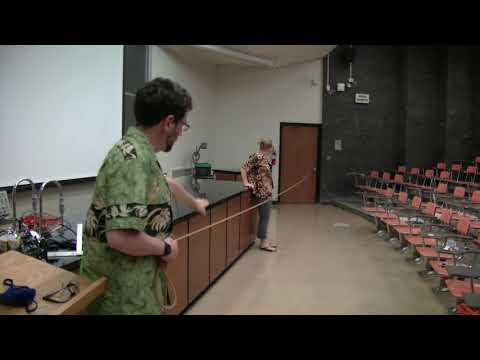

In [13]:
YouTubeVideo('KjjZx5MP36s', width=560, height=315)

## Analytical resolution

Analytically speaking, it is relatively easy to compute the Fourier decomposition of a string, plucked in the middle:
$$ y(0, x) = P(x) = \frac{2a x}{L} \quad \textrm{for} \quad 0\leq x < L/2, $$
$$ y(0, x) = P(x) = 2a\left(1 - \frac{x}{L}\right) \quad \textrm{for} \quad L/2 \leq x \leq L. $$

As before, we will consider the case $\dot y(0, x) = V(x) = 0$, which again means that $\forall n\in \mathbb N^*$, $\beta_n = 0$.

\begin{align*}
    \alpha_n & = P(x) \odot \sin(k_n x) \\
             & = \frac{4a}L \left[\int_0^{L/2}\frac{x}{L} \sin(k_n x)\di x + \int_{L/2}^L \left(1 - \frac{x}{L}\right) \sin(k_n x)\di x\right].
\end{align*}

A useful formula to compute these integrals is
$$ \int x' \sin(bx') \di x' = \frac{\sin(bx)}{b^2} - \frac{x\cos(bx)}{b} \quad\text{for}\quad b\neq 0,$$
which is the result of an integration by parts, followed by a simple integration.
Ask SymPy if you are curious:

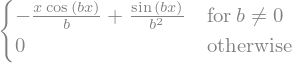

In [32]:
from sympy import symbols, sin, integrate, init_printing  # symbolic math operations
init_printing(use_unicode=True)  # to print pretty

n = symbols('n', integer=True, positive=True)
x, L = symbols('x, L', real=True, positive=True)
b = symbols('b', real=True)

integrate(x*sin(b*x), x)

Told ya.

The first integral is
\begin{align*}
    \int_0^{L/2}\frac{x}{L} \sin(k_n x)\di x 
        & = \frac{1}{k_n L} \left[ \frac{\sin(k_n x)}{k_n} - x\cos(k_n x) \right]_0^{L/2} \\
        & = \frac{L}{n\pi}\left[\frac{1}{n\pi}\sin\left(\frac{n\pi}{2}\right) - \frac12\cos\left(\frac{n\pi}{2}\right) \right].
\end{align*}

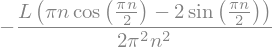

In [31]:
from sympy import pi
# SymPy check:
factor(integrate(x/L*sin(n*pi*x/L), (x, 0, L/2)))  # for verification

For the other integral, and following a similar calculation, we get
$$\int_{L/2}^L\left(1 - \frac{x}{L}\right) \sin(k_n x)\di x = \frac{L}{n\pi}\left[\frac{1}{n\pi}\sin\left(\frac{n\pi}{2}\right) + \frac12\cos\left(\frac{n\pi}{2}\right) \right]. $$

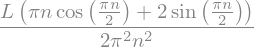

In [16]:
# SymPy check
factor(integrate((1-x/L)*sin(n*pi*x/L), (x, L/2, L)))  # for verification

Adding the two, we get
$$ \int_0^{L/2}\frac{x}{L} \sin(k_n x)\di x + \int_{L/2}^L \left(1 - \frac{x}{L}\right) \sin(k_n x)\di x = \frac{2L}{(n\pi)^2}\sin\left(\frac{n\pi}{2}\right) $$

The final form of $\alpha_n$ is therefore
$$ \alpha_n = \frac{8 a}{(n\pi)^2}\sin\left(\frac{n\pi}{2}\right) = 0 \quad\textrm{if } n\textrm{ is even,  and } \quad \frac{8 a}{(n\pi)^2}(-1)^{(n-1)/2}\quad\textrm{if } n\textrm{ odd}. $$

Let us only consider the $n$-is-odd case then.
If we introduce the intermediate integer $m = 1, 2, \dots{}$ and let $n=2m+1$, we make sure $n$ is indeed odd.
From equation \eqref{eq:generaly}, the solution to the string, plucked in the middle is therefore:
$$ \boxed{y(t, x) = \frac{8a}{\pi^2}\sum_{m=0}^{\infty}\frac{(-1)^{m}}{(2m+1)^2}\cos\left(\frac{(2m+1)\pi v}{L}t\right)\sin\left(\frac{(2m+1)\pi}{L}x\right)}. $$

## Plotting the solution: Spectrum

Then, there is the problem of the graphic representation of any solution we found.
I could display an animation, as I did before, but while pedagogically useful, there is a better way to represent the same amount of the information in a more concise way.
After all, if the motion is harmonic, we don't need to display a moving string to know the time information, which is completely encapsulated in the the pre-factors of each harmonic as a function of $n$, $\omega_n$ or $k_n$.

A solution is therefore to plot the amplitude as a function of frequency, and the plot is called a **spectrum**.

Two remarks on spectra.

* We did plot very similar graphs on the lecture on resonance, when we were plotting the amplitude (or dissipated power) as a function of frequency. And indeed, we do not have dissipation, meaning that we don't need to invoke forcing to describe sustained oscillations. If we introduced damping and forcing, we could plot spectra of the string vibrations under a certain periodic forcing as a function of frequency indeed, and it would look very similar.
* You might remember from your linear algebra class that "spectrum" is also the name of the set of eigenvalues of a matrix. While a set is not a plot, there is a connection, because the plot will have all the frequencies on the $x$-axis, and because there is a connection between these frequencies, the eigenfrequencies of the coupled oscillators, and linear algebra.

Although complicated, we can plot the formula above relatively easily as a spectrum. Let me compute a few values, with $d = 1$ cm, $L = 1$ m.

* $y_1(t, x) = \frac{8a}{\pi^2}\cos\frac{\pi v t}L\sin\frac{\pi x}L$,
* $y_2(t, x) = 0$,
* $y_3(t, x) = -\frac{8a}{9\pi^2}\cos\frac{3\pi v t}L\sin\frac{3\pi x}L$,
* $y_4(t, x) = 0$,
* $y_5(t, x) = \frac{8a}{25\pi^2}\cos\frac{5\pi v t}L\sin\frac{5\pi x}L$,
* $y_6(t, x) = 0$,
* ...

We can easily plot the spectrum for the first few modes.

In [17]:
# Let's plot
def plot_spectrum():
    N = 8
    ftsz = 13
    plt.figure()
    for n in range(N):
        plt.plot([n+1]*2, [0, np.sin(0.5*(n+1)*np.pi)/(n+1)**2], 'o-', linewidth=5)
    plt.axis([0, N+0.5, -0.15, 1.1])
    plt.axhline(0., color='k')
    plt.xticks(range(1, N+1), 
              ['$\omega_{0:1d}$'.format(n) for n in range(1, N+1)],
              fontsize=ftsz)
    plt.xlabel('Vibration frequency ($\omega_n = n\pi v/L$)', fontsize=ftsz)
    plt.ylabel(r'Modal amplitude $\alpha_n\pi^2/(8a)$', fontsize=ftsz)
    plt.grid()
    return

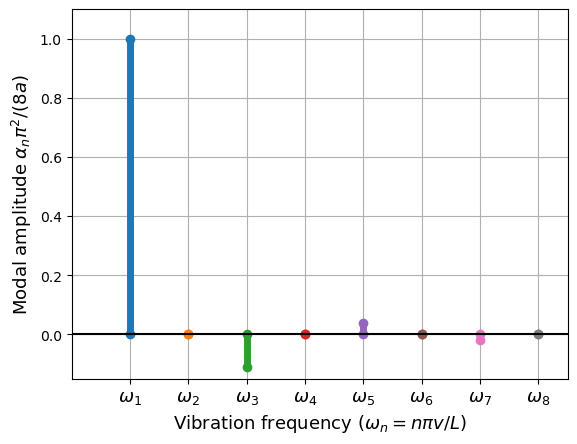

In [18]:
plot_spectrum()

The amplitude of each mode decays fast with the mode number.
This is because by plucking the string in the middle, we created a "large-scale pattern" whose Fourier series converges very fast.
We can plot this to visualise better.

*Note: usually, a "spectrum" plots $|\alpha_n|$ or $|\alpha_n|^2$, not $\alpha_n$ as I did, as if the sign was included in the phase of $\cos(\omega_n t)$.*

In [19]:
def plot_convergence():
    N = 8
    # I have to redefine the two quantities below because I used them as symbols in-between
    L = 1.  # length of string: 33 cm
    x = np.linspace(0., L, 128)  # the x array

    mode = {}  # all modes stored in a dictionary
    y_approx = 0*x  # this will be the sum of thre first N modes
    y_init = 2*x/L  # the first part of the string; I will divide all y's by d
    y_init[x > 0.5*L] = 2. * (1 - x[x > 0.5*L]/L)  # the 2nd part

    fig = plt.figure(figsize=(8, 6))  # Make the figure a little bigger than usual

    ff = 1  # frame number, or subplot number
    for m in range(N//2):
        n = 2*m + 1

        mMax = 8/(n*np.pi)**2
        mode[n] = mMax * np.sin(0.5*n*np.pi) * np.sin(n*np.pi*x/L)
        y_approx += mode[n]

        axl = fig.add_subplot(len(range(N//2)), 2, ff)
        axl.plot(x/L, mode[n])
        axl.axis([0, 1., -mMax*1.1, mMax*1.1])
        axl.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
        axl.set_ylabel(r'$N = {0:1d}$'.format(n))
        axl.set_yticks([-mMax, 0., mMax])
        axl.grid()

        axr = fig.add_subplot(len(range(N//2)), 2, ff+1)
        axr.plot(x/L, y_approx, x/L, y_init, 'r--')
        axr.axis([0, 1., 0., y_init.max()])
        axr.set_yticks([0., 0.5, 1.])
        axr.grid()

        if n == 1:
            axl.set_title(r'$\alpha_N\sin(k_N x)$')
            axr.set_title(r'$\sum_{n=1}^N\alpha_n\sin(k_n x)$')

        if m == N//2-1:
            axl.set_xlabel('$x/L$')
            axr.set_xlabel('$x/L$')
        else:
            axl.set_xticklabels([])
            axr.set_xticklabels([])

        ff += 2

    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    
    return mode

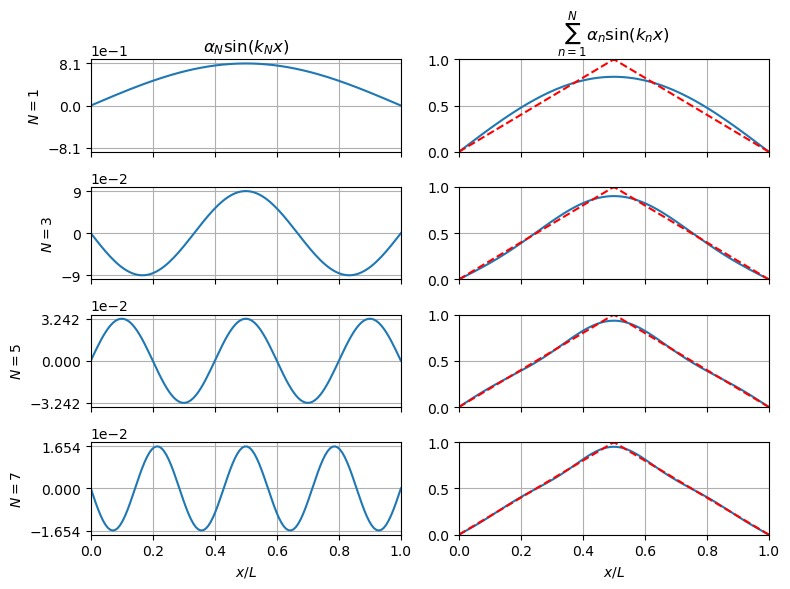

In [20]:
mode = plot_convergence()

In the figure above, the left column shows each individual initial mode, and the right column shows their sum, up to the mode on the left.
Notice how after three modes ($N = 5$), most of the pattern is captured, and adding the fourth mode ($n=7$) does not improve the solution that much.
This is why this approach is feasible: because we usually don't need an infinite number of modes to obtain a satisfying approximation to the solution.

Solving for the initial conditions means that we solved the problem at all times, as the animation below (saved under `PluckMiddle.mp4`) shows.

In [21]:
# Various quantities
N = 8  # number of modes I want to display
# Below are number for the string E of a violin (I think)
L = .33  # length of string: 33 cm
x = np.linspace(0., L, 128)  # the x array
F = 68  # tension in the string: 68 N
mu = 0.125/L  # mass per unit lenght of the string

v = np.sqrt(F/mu)  # phase speed
k0 = np.pi/L  # the fundamental k; k_n = n*k0 and omega_n = n*v*k0

k = [n*k0 for n in range(1, N+1)]  # the list of k's
omega = [n*k0*v for n in range(1, N+1)]  # the list of k's

t_end = 2.*np.pi/(omega[0]) # time array spans one fundamental frequency
n_frames = 100  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array

k = [n*k0 for n in range(1, N+1)]  # the list of k's
omega = [n*k0*v for n in range(1, N+1)]  # the list of k's

imagelist = []  # list of frames to eventually animate

# Animation
fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., 1.])
ax.set_ylim([-1., N//2+0.5])
ax.set_xlabel('$x/L$', fontsize=ftsz)
ax.set_yticks(range(0, N//2+1))
ax.set_yticklabels(['$tot$', '1', '3', '5', '7'])
ax.set_ylabel('$y_n(t, x)/a + \mathrm{ mode\ number}\ n$', fontsize=ftsz)
ax.grid()

k = [n*k0 for n in range(1, N+1)]  # the list of k's
omega = [n*k0*v for n in range(1, N+1)]  # the list of k's

x_positions = np.tile(x, (N//2+1, 1))/L  # replicate the x array N/2+1 times
for t in time: # We loop over time to animate the modes
    y_modes = 0*x_positions  # nx positions for N modes
    for m in range(N//2):
        n = 2*m + 1
        y_modes[m, :] = 1 + m + mode[n]*np.cos(omega[n]*t)
        y_modes[N//2, :] += y_modes[m, :] - 1 - m

    im = plt.scatter(x_positions, y_modes, c=y_modes, cmap='copper')
    imagelist.append([im])

# Creation of the animation
ani = animation.ArtistAnimation(fig, imagelist, interval=40, blit=True, repeat_delay=80)
plt.close()

In [22]:
# Show the animation
HTML(ani.to_html5_video())

In [23]:
# Save the animation
ani.save('PluckMiddle.mp4')

# Some videos

I find them cool and instructive.

## Bowed Violin String in Slow Motion

https://youtu.be/6JeyiM0YNo4

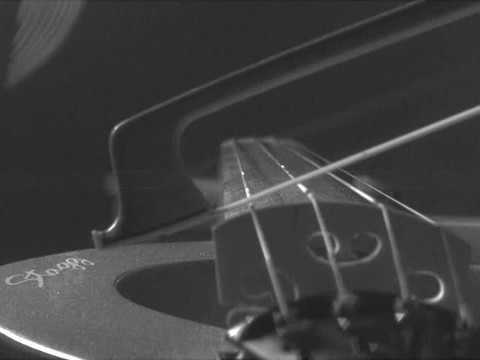

In [24]:
YouTubeVideo('6JeyiM0YNo4', width="560", height="315", start='55')

About this video of a violin string, note that:

* The oscillation is created by the bow of the violin, sticking-and-slipping (this is actually a real expression) at a frequency that resonates with the oscillation we see.
* When the bow is removed, towards the end of the video, you can see that very quickly, the oscillation becomes like a fundamental oscillation, and nothing else, the kink is gone. That's because in reality, there is damping, and the higher the harmonic is, the stronger the damping acts on it. Indeed, as we saw before, the kink is reproduced by very high modes, and those modes oscillate faster. Assuming (and this is actually a conservative assumption) that the damping force on a mode $n$ can be modeled as something like $-b\dot y$ again, then it proportional to the frequency: $F_{damping} \propto \sum -\omega_n\alpha_n\sin(\omega_n t)\sin(k_nx)$. Therefore, the higher a mode is, the faster the damping is. After a short period of time, damping has killed all the modes but the fundamental, which is the last harmonic standing (pun intended).
* The violin is out-of-tune to visualize a pattern. The string's oscillations are way too large for a functioning violin.

## Chladni Plate

Please first watch the following video first (also at https://youtu.be/dXeBvQdkhaw and https://play.library.utoronto.ca/85ee379e108e534320503428bf84cdf2). It is not the best, but it was a pain in the neck to record.

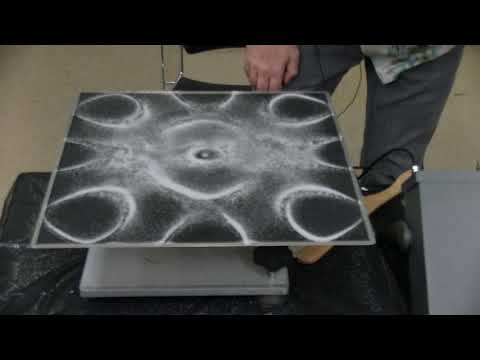

In [25]:
YouTubeVideo('dXeBvQdkhaw', width=560, hieght=315)

Now that you've indulged me, you can watch the much better video below (also at https://youtu.be/wvJAgrUBF4w).

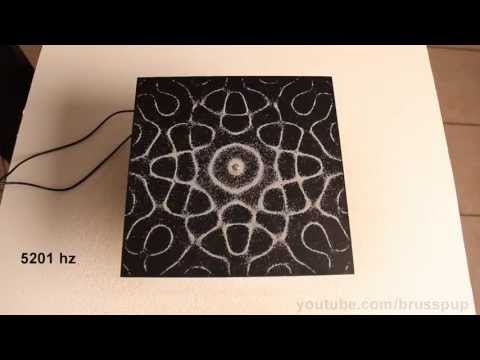

In [26]:
YouTubeVideo('wvJAgrUBF4w', width=560, hieght=315)

For an in-house explanation, see the web page, created by our very own Prof. Stephen Morris: https://www.physics.utoronto.ca/~nonlin/chladni.html

## Fourier Analysis on musical instruments

https://youtu.be/u1Lz8pm2npQ

I love it and I hate it: this guy makes me look lame. Goes way beyond what I covered, in a compressed amount of time.

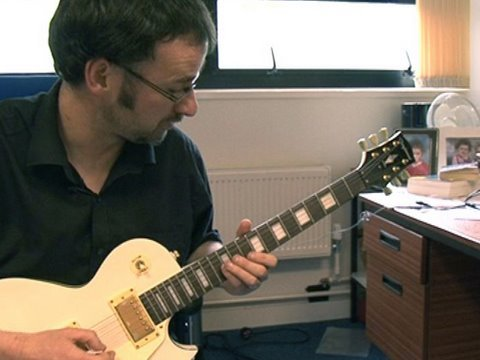

In [27]:
YouTubeVideo("u1Lz8pm2npQ", width="560", height="315")

## Ruben's Tubes

Our department has its own recording: https://ugdemos.physics.utoronto.ca/db/videos/rubens-flame-tube

The video below is more spectacular (https://youtu.be/2awbKQ2DLRE), though ours has its charm.
The first minute of the video is pretty instructive, but the entire video is like a pyrotechnical version of a Chladni plate.

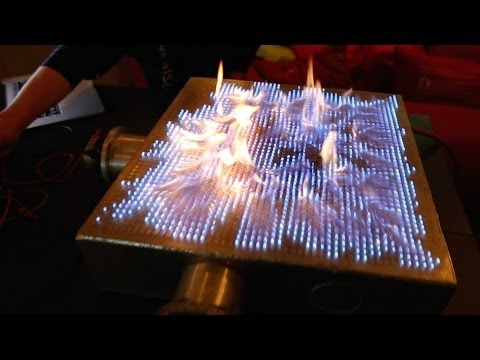

In [28]:
YouTubeVideo("2awbKQ2DLRE", width=560, height=315)

## The Walking Water Mystery

https://youtu.be/KJDEsAy9RyM

The connection with standing waves may not be obvious at first. Jump to 4'15 or 8'14 if you are impatient, but the whole thing is worth a watch. Awesome stuff at 9'30.

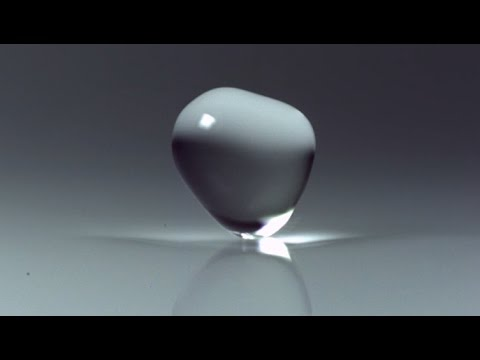

In [29]:
YouTubeVideo("KJDEsAy9RyM", width="560", height="315")

# Energy of Standing Waves

## General expression for transverse oscillations of a vibrating string

We take the example of transverse oscillations on a vibrating string, where $v = \sqrt{F/\mu}$.

Consider an infinitesimal piece of string located between $x$ and $\delta x$.
Its kinetic energy is 
$$\delta K = \frac12\underbrace{\mu\delta x}_{=\delta m} \dot y^2.$$

Its potential energy is due to the stretching of the piece of string when in motion, and to calculate it, we calculate the work done by the tension force $F$ to stretch the string by an amount $\epsilon$, $W = -F\epsilon$, with a minus sign because the tension $F$ points in the opposite direction as a positive stretching.
And from lecture 6, we will use the relationship $W = -\delta U$.
The length at rest is $\delta x$, and the length when stretched is $\delta s = \delta x/\cos\theta$, where $\theta$ is the angle of the string in motion with the $x$-axis.
The motion is linear and the angles are small, meaning that 
$$\delta s = \frac{\delta x}{\cos\theta} \approx \frac{\delta x}{1 - \theta^2/2}\approx \delta x \left(1 + \frac{\theta^2}2\right) \thrfor \epsilon = \delta s - \delta x \approx \frac12 \delta x\, \theta^2,$$
with two Taylor expansions back-to-back to feel alive.
But if the angle is small, then $\theta \approx \tan\theta = \partial y /\partial x$, and
$$\epsilon \approx \frac12 \delta x \left(\pde y x\right)^2.$$
Collecting everything,
$$\delta U = - W =  F\epsilon \approx  F\delta x \frac12\left(\pde y x\right)^2 = \frac12 \mu \delta x v^2 \left(\pde y x\right)^2.$$

We then let $\delta x \to 0$ so all the $\approx$'s turn into $=$'s, and sum up all of the infinitesimal contributions, yielding the energy of the vibrating string
$$E =  \frac12 \mu \int_0^L \left[\left(\pde{y}t\right)^2 + v^2\left(\pde{y}x\right)^2 \right]\di x.$$

## Single Mode

For a single mode, and assuming for simplicity that $V(x) = 0$,
$$y(t, x) = y_n(t, x) = A_n \cos(\omega_n t)\sin(k_n x),$$
$$\pde{y}t = -\omega_n A_n \sin(\omega_n t)\sin(k_n x),\textrm{ and}$$
$$\pde{y}x = k_n A_n \cos(\omega_n t)\cos(k_n x).$$

Substituting into the expression for energy,
\begin{align*}
    E_n & = \frac12 \mu \int_0^L \left[\omega_n^2 A_n^2 \sin^2(\omega_n t)\sin^2(k_n x)  + v^2k_n^2 A_n^2 \cos^2(\omega_n t)\cos^2(k_n x)\right]\di x, \\
        & = \frac12 \mu \omega_n^2 A_n^2 \left[\sin^2(\omega_n t)\int_0^L \sin^2(k_n x)\di x + \cos^2(\omega_n t)\int_0^L\cos^2(k_n x)\di x\right].
\end{align*}

You can keep computing (in which case you could use $\cos^2 + \sin^2 = 1$), or remember the normalization of the inner product $\odot$, or convince yourself by drawing $\cos^2$ and $\sin^2$, that the two integrals are the same:
$$\int_0^L \sin^2(k_n x)\di x = \int_0^L \cos^2(k_n x)\di x = \frac{L}2.$$

And because $\cos^2(\omega_n t) + \sin^2(\omega_n t) = 1$,
\begin{equation}
\boxed{E_n = \frac14\mu L\omega_n^2 A_n^2}.
\label{eq:En}
\end{equation}

The expression above has a lot going on, and it may seem foolish to remember it.
However, there actually is physics in there, and it is not so complicated.
The energy of the SHO was already $kA^2/2 = m\omega_0^2 A^2/2$, and so, if you could remember the energy of the SHO, you can remember this one.

* $E_n \propto m = \mu L$, the mass of the string. Why not. 
* $E_n \propto A_n^2$: quadratic dependence of the energy on the amplitude, a super-duper general statement that you have been needing to remember from the start of this lecture series,
* $E_n \propto \omega_n^2$, same for the energy of the SHO. "Everything else being equal, a mode that oscillates twice as fast has four times the energy."
* Factor 1/4: we all wish it was 1/2, for the sake of remembering better. Oh well...

If we had different boundary conditions, we may have a combination of $\sin(k_n x)$ and $\cos(k_n x)$ in $y_n(t, x)$, but the derivation would be conceptually the same, and we would still find Eq. \eqref{eq:En}. 

## Many modes

With more than one mode,
$$ y(t, x) = \sum_{n=1}^\infty A_n \cos(\omega_n t + \phi_n)\sin(k_n x).$$
Let's discard $\phi_n$, for example by assuming $V(x) = 0$.

\begin{align*}
    \pde{y}t & = -\sum_{n=1}^\infty \omega_n A_n \sin(\omega_n t)\sin(k_n x),\textrm{ and}\\
    \left(\pde{y}t\right)^2 & = \left[\sum_{n=1}^\infty \omega_n A_n \sin(\omega_n t)\sin(k_n x)\right]\left[\sum_{m=1}^\infty \omega_m A_m \sin(\omega_m t)\sin(k_m x)\right] \\
                            & = \sum_{n=1}^\infty \left[\omega_n A_n \sin(\omega_n t)\sin(k_n x)\right]^2 + 2\sum_{m=1}^\infty\sum_{n=m+1}^\infty \omega_m A_m\omega_n A_n \sin(\omega_m t)\sin(k_m x)\sin(\omega_n t)\sin(k_n x).
\end{align*}

Notice the $2\sum_{m=1}^{\infty}\sum_{n=m+1}^{\infty}$ double sum (like I need to remind you of it).
The factor 2 is here because each term that has $m\neq n$ will appear twice, say, the couples $\{m=1, n=2\}$ and $\{m=2, n=1\}$ each appear once, but lead to the same expression. Might as well just sum them once by starting with $n=m+1$, but make them count twice.
We start the second sum at $n=m+1$, not $n=m$, because the $n=m$ case is treated separately, in the first summation.

Before going any further, let us not forget that eventually, we will integrate these sums over $[0, L]$.
In particular, the double sum will only contain terms proportional to 
$$\int_0^L\sin(k_m x)\sin(k_n x) \di x = 0\quad \textrm{because}\quad n\neq m.$$
Therefore, 
$$ \int_0^L \left(\pde{y}t\right)^2 \di x = \sum_{n=1}^\infty \int_0^L \left[\omega_n A_n \sin(\omega_n t)\sin(k_n x)\right]^2 \di x = \sum_{n=1}^\infty \int_0^L \left(\pde{y_n}{t}\right)^2 \di x. $$


A very similar derivation leads to
$$ \int_0^L\left(\pde{y}x\right)^2\di x = \sum_{n=1}^\infty\int_0^L \left(\pde{y_n}{x}\right)^2 \di x, $$
and therefore,
$$\boxed{E = \sum_{n=1}^\infty E_n} = \frac{1}{4}\mu L \sum_{n=1}^\infty \omega_n^2 A_n^2.$$

In Fourier series parlance, we have illustrated here Parseval's theorem.

Just like for coupled oscillators, **each mode has its own energy, it does not communicate it to any other mode, and the total energy is the sum of the energy of each mode.** Remember it!

# Summary

In this lecture, we saw:

* the take-home message about Fourier series: what they are, what they mean, how we apply them to our finite-length string,
* Just like Fourier modes are orthogonal to one another, standing wave modes don't project onto one another when using the inner product we described.
* To solve any initial value problem, we turn two equations ($y$ and $\dot y$) that contain an infinite number of terms into two infinite sets of one-term equations. And it's better than way.
* Spectra are plots of the series of modes, displaying the coefficients multiplying each mode on the $y$-axis as function of $n$, $\omega_n$ or $k_n$ on the $x$-axis.
* The energy in each mode is separate from the energies in the other modes: there is no energetic coupling between the modes.